# Filtros Analógicos

>


___

## Explicando o código:

Primeiro, importamos as bibliotecas numpy e matplotlib. Em seguida, definimos os parâmetros do filtro, incluindo a frequência de corte e a ordem do filtro.
Você pode ajustar os parâmetros do filtro e a faixa de frequência para atender às suas necessidades específicas.

## Projetando o filtro Analógico

Frequência limite da Banda de Rejeição [Vermelho]: 999.9999999999999
Frequência de Corte [Verde]: 4469.3382458075575
Frequência Desejada [Amarelo]: 1000
Frequência Complementar (banda oposta) [Roxa]: 7795.67764696017


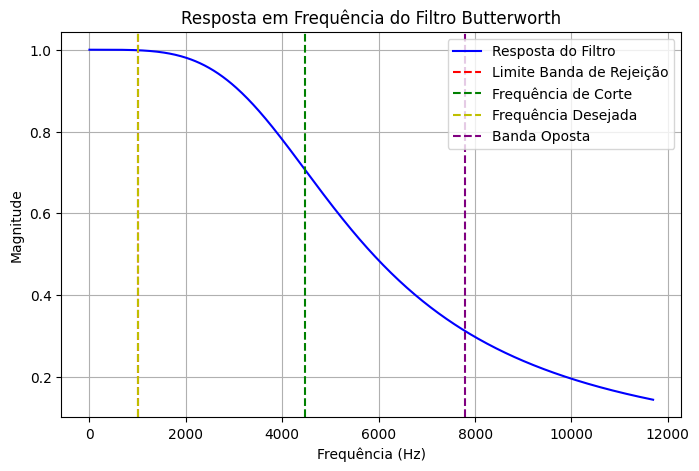

Frequência de Corte escolhida (Hz): 4469.3382458075575
O valor da capacitancia é:  3.561040456966754e-08


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def findAnalogFilterByTargetFreq(fDesejada, ordem, filterType, desvio, isBP):
    omega_d = 2 * np.pi * fDesejada
    M_target = 1 - desvio if isBP else desvio

    A = ((1 / (M_target**2)) - 1)**(1 / (2 * ordem))

    # Calcular omega_c corretamente
    if filterType.lower() == 'lowpass':
        omega_c = omega_d / A
    elif filterType.lower() == 'highpass':
        omega_c = omega_d * A
    else:
        raise ValueError("filterType deve ser 'lowpass' ou 'highpass'.")

    # Calcular frequência limite (magnitude = M_target)
    if filterType.lower() == 'lowpass':
        omega_edge = omega_c * A
    else:
        omega_edge = omega_c / A

    # Frequência complementar (borda da outra banda)
    M_comp = desvio if isBP else 1 - desvio
    A_comp = ((1 / (M_comp**2)) - 1)**(1 / (2 * ordem))
    if filterType.lower() == 'lowpass':
        omega_comp = omega_c * A_comp
    else:
        omega_comp = omega_c / A_comp

    # Converter para Hz
    fc_escolhido_hz = omega_c / (2 * np.pi)
    freq_limite = omega_edge / (2 * np.pi)
    f_comp_hz = omega_comp / (2 * np.pi)

    # Frequências para o gráfico
    f_min = 0
    f_max = max(fDesejada, fc_escolhido_hz, freq_limite, f_comp_hz) * 1.5
    freqs = np.linspace(f_min, f_max, 1000)
    w = 2 * np.pi * freqs

    if filterType.lower() == 'lowpass':
        H = 1 / np.sqrt(1 + (w / omega_c)**(2 * ordem))
    else:
        H = 1 / np.sqrt(1 + (omega_c / w)**(2 * ordem))

    # Plotagem
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(freqs, H, label='Resposta do Filtro Butterworth', color='blue')
    ax.axvline(fDesejada, color='yellow', linestyle='--', label='Frequência Desejada')
    ax.axvline(fc_escolhido_hz, color='green', linestyle='--', label='Frequência de Corte')
    ax.axvline(freq_limite, color='red', linestyle='--', label='Limite da Banda de Interesse')
    ax.axvline(f_comp_hz, color='purple', linestyle='--', label='Frequência Complementar')

    ax.set_xlim(0, f_max * 1.1)
    ax.set_ylim(0, 1.1)
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Magnitude")
    ax.set_title("Filtro Butterworth - Resposta em Frequência")
    ax.grid(True)
    ax.legend()
    plt.tight_layout()
    plt.show()

    print("Frequência Desejada [Amarelo]:", fDesejada)
    print("Frequência de Corte [Verde]:", fc_escolhido_hz)
    print(("Limite da Banda de Passagem" if isBP else "Limite da Banda de Rejeição") + " [Vermelho]:", freq_limite)
    print("Frequência Complementar (banda oposta) [Roxa]:", f_comp_hz)

    return fc_escolhido_hz

if __name__ == '__main__':
    fc = findAnalogFilterByTargetFreq(
        fDesejada=1000,      # Frequência desejada em Hz
        ordem=2,
        filterType='lowpass',
        desvio=0.05,
        isBP=True           # Banda de rejeição
    )
    print("Frequência de Corte escolhida (Hz):", fc)

    # Projeto do filtro Sallen-Key
    R = 1000  # 1kΩ
    c = 1 / (2 * np.pi * fc * R)
    print("Valor da Capacitância (Farads):", c)


## Topologia de Sallen-Key




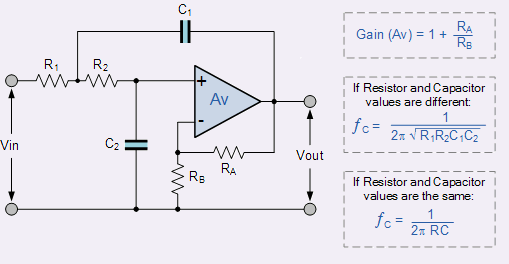

In [7]:
R = 1000
c = 1/(2*np.pi*fc*R)
print("O valor da capacitancia é: ",c)

O valor da capacitancia é:  9.124499435026533e-08
